# Goals

In this notebook, we want to:
1. Slicing train data set table with only ordinal data
2. standardizing data
3. using PCA to determined the most impactful feature

# Coding

## Transforming table

### Importing data

In [44]:
import pandas as pd

In [45]:
# import train.csv
url_train = "https://raw.githubusercontent.com/naufaldi-fir/adoption-prediction-project/main/Data%20Set/train.csv"
train = pd.read_csv(url_train)
print(train)

       Type            Name  Age  Breed1  Breed2  Gender  Color1  Color2  \
0         2          Nibble    3     299       0       1       1       7   
1         2     No Name Yet    1     265       0       1       1       2   
2         1          Brisco    1     307       0       1       2       7   
3         1            Miko    4     307       0       2       1       2   
4         1          Hunter    1     307       0       1       1       0   
...     ...             ...  ...     ...     ...     ...     ...     ...   
14988     2             NaN    2     266       0       3       1       0   
14989     2  Serato & Eddie   60     265     264       3       1       4   
14990     2         Monkies    2     265     266       3       5       6   
14991     2         Ms Daym    9     266       0       2       4       7   
14992     1            Fili    1     307     307       1       2       0   

       Color3  MaturitySize  ...  Health  Quantity  Fee  State  \
0           0        

### Slicing table

List of ordinal categorical and binary data are Age, MaturitySize, vaccinated, dewormed, sterilized, health, and fee.

In [46]:
# make new table only for ordinal data
ordinal_feature=[ 'Age', 'MaturitySize',"FurLength", 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Fee']
ordinal = train[ordinal_feature]
print(ordinal)

       Age  MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  Health  \
0        3             1          1           2         2           2       1   
1        1             2          2           3         3           3       1   
2        1             2          2           1         1           2       1   
3        4             2          1           1         1           2       1   
4        1             2          1           2         2           2       1   
...    ...           ...        ...         ...       ...         ...     ...   
14988    2             2          2           2         2           2       1   
14989   60             2          2           1         1           1       1   
14990    2             3          2           2         1           3       1   
14991    9             1          1           1         1           1       1   
14992    1             2          1           2         2           2       1   

       Fee  
0      100  
1

### Exploration on ordinal data

In [47]:
import seaborn as sns

#### Age Feature

count    14993.000000
mean        10.452078
std         18.155790
min          0.000000
25%          2.000000
50%          3.000000
75%         12.000000
max        255.000000
Name: Age, dtype: float64

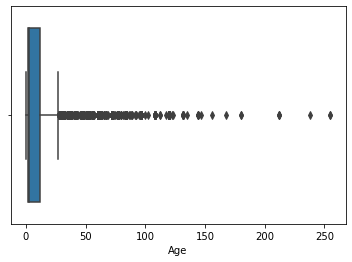

In [48]:
sns.boxplot(data = ordinal, x = "Age")
ordinal.Age.describe()
#print(ordinal.Age.quantile(0.75))
# counting how many outliers 

From the data we know that outlier start from 12 + (12-2)*1,5 = 27. 

In [49]:
# Counting how many outlier we have
ordinal["Age"][ordinal["Age"] > 27].count()

1501

**Decision 1:** 1501 is 10,0% of the data. We will remove all the rows which has Age value more than 27.

#### Fee Feature

count    2330.000000
mean      136.803004
std       154.166378
min         1.000000
25%        50.000000
50%       100.000000
75%       200.000000
max      3000.000000
Name: Fee, dtype: float64


<AxesSubplot:xlabel='Fee'>

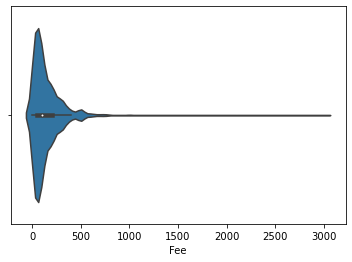

In [50]:
ordinal_fee = ordinal[ordinal["Fee"] > 0]
print(ordinal_fee["Fee"].describe())
sns.violinplot(data = ordinal_fee, x = "Fee")

Maximum of the data is (200-50)*1,5 + 200 = 375.

In [51]:
# counting outlier
print(sum(ordinal_fee["Fee"] > 375))

148


**Decision 2**: Remove rows with fee more than 375

#### Fur Lenght Feature

FurLength
1    8808
2    5361
3     824
Name: FurLength, dtype: int64


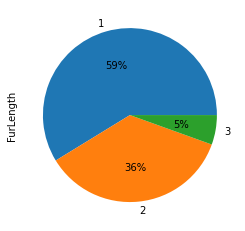

In [52]:
pie_group = ordinal.groupby("FurLength")["FurLength"].count()
print(pie_group)
pie_group.plot.pie(autopct = lambda p: "{:.0f}%".format(p));

Data is ready for PCA

#### Maturity Size

MaturitySize
1     3395
2    10305
3     1260
4       33
Name: MaturitySize, dtype: int64


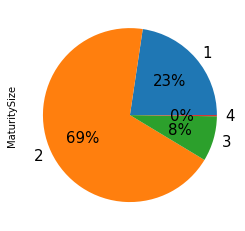

In [53]:
pie_size = ordinal.groupby("MaturitySize")["MaturitySize"].count()
print(pie_size)
pie_size.plot.pie(autopct = lambda p: "{:.0f}%".format(p),textprops = {"fontsize":15});

**Decision 3**: There are small amount of data that has value 4. we will impute the data to value 3 to make the model better

#### Vaccinated, Dewormed, Sterilized Feature

Make all pie chart for mentioned feature

In [58]:
X = ["Vaccinated", "Dewormed","Sterilized"]
for x in X:
    pie_size = ordinal.groupby(x)[x].count()
    print(pie_size)
    #pie_size.plot.pie(autopct = lambda p: "{:.0f}%".format(p),textprops = {"fontsize":15});

Vaccinated
1    5898
2    7227
3    1868
Name: Vaccinated, dtype: int64
Dewormed
1    8397
2    4815
3    1781
Name: Dewormed, dtype: int64
Sterilized
1     3101
2    10077
3     1815
Name: Sterilized, dtype: int64


In [65]:
# Analize every row that has value "not sure" or 3
notsure = ordinal[(ordinal["Vaccinated"] == 3 )| (ordinal["Dewormed"] == 3 )|( ordinal["Sterilized"]  ==3)]
notsure.shape

(2716, 8)

In [69]:
# make diagram venn
a = notsure["Vaccinated"].index.tolist()
#print(a)
print(a.length)

AttributeError: 'list' object has no attribute 'length'

#### Removing Age Outlier

In [33]:
ordinal_1 = ordinal[ordinal["Age"]<27]
ordinal_1.shape

(13475, 7)

## Standardizing Table

### importing modul and scale the table

In [4]:
# import standard scaler module and standardized train the table
from sklearn.preprocessing import StandardScaler

table_unscaled = ordinal
scaler = StandardScaler()
table_scaled = pd.DataFrame(scaler.fit_transform(table_unscaled))
print(table_scaled)

              0         1         2         3         4         5         6
0     -0.410466 -1.573167  0.402608  0.634200  0.151502 -0.183518  1.004184
1     -0.520627  0.251848  1.900450  2.071408  1.917809 -0.183518 -0.271132
2     -0.520627  0.251848 -1.095234 -0.803007  0.151502 -0.183518 -0.271132
3     -0.355385  0.251848 -1.095234 -0.803007  0.151502 -0.183518  1.641842
4     -0.520627  0.251848  0.402608  0.634200  0.151502 -0.183518 -0.271132
...         ...       ...       ...       ...       ...       ...       ...
14988 -0.465546  0.251848  0.402608  0.634200  0.151502 -0.183518 -0.271132
14989  2.729133  0.251848 -1.095234 -0.803007 -1.614805 -0.183518 -0.271132
14990 -0.465546  2.076863  0.402608 -0.803007  1.917809 -0.183518  0.111463
14991 -0.079981 -1.573167 -1.095234 -0.803007 -1.614805 -0.183518 -0.271132
14992 -0.520627  0.251848  0.402608  0.634200  0.151502 -0.183518 -0.271132

[14993 rows x 7 columns]


### Naming the columns

In [5]:
table_scaled.set_axis(ordinal_feature, axis = 1, inplace = True)
print(table_scaled)

            Age  MaturitySize  Vaccinated  Dewormed  Sterilized    Health  \
0     -0.410466     -1.573167    0.402608  0.634200    0.151502 -0.183518   
1     -0.520627      0.251848    1.900450  2.071408    1.917809 -0.183518   
2     -0.520627      0.251848   -1.095234 -0.803007    0.151502 -0.183518   
3     -0.355385      0.251848   -1.095234 -0.803007    0.151502 -0.183518   
4     -0.520627      0.251848    0.402608  0.634200    0.151502 -0.183518   
...         ...           ...         ...       ...         ...       ...   
14988 -0.465546      0.251848    0.402608  0.634200    0.151502 -0.183518   
14989  2.729133      0.251848   -1.095234 -0.803007   -1.614805 -0.183518   
14990 -0.465546      2.076863    0.402608 -0.803007    1.917809 -0.183518   
14991 -0.079981     -1.573167   -1.095234 -0.803007   -1.614805 -0.183518   
14992 -0.520627      0.251848    0.402608  0.634200    0.151502 -0.183518   

            Fee  
0      1.004184  
1     -0.271132  
2     -0.271132  
3  

## Using PCA to determine most impactful feature

### Basic Understanding

*"PCA (Principal Components Analysis) gives us our ideal set of features. It creates a set of principal components that are rank ordered by variance (the first component has higher variance than the second, the second has higher variance than the third, and so on), uncorrelated, and low in number (we can throw away the lower ranked components as they contain little signal)."*

Source: [Understanding PCA (Principal Components Analysis) by Tony Yiu (Towards Data Science)](https://towardsdatascience.com/understanding-pca-fae3e243731d)

*"PCA is essentially a method that reduces the dimension of the feature space in such a way that new variables are orthogonal to each other (i.e. they are independent or not correlated). Before applying PCA, we scale our data such that each feature has unit variance. This is necessary because fitting algorithms highly depend on the scaling of the features. While applying PCA you can mention how many **principal** components you want to keep.*

*PCA works its magic by repeatedly asking and answering the following questions:*
1. *At the very start of the process, PCA asks what is the strongest underlying trend in the feature set (we will call this component 1)?*.
2. *Next PCA asks what is the second strongest underlying trend in the feature set that also happens to be uncorrelated with component 1 (we will call it component 2)?*
3. *Then PCA asks what is the third strongest underlying trend in the feature set that also happens to be uncorrelated with both components 1 and 2 (we will call it component 3)?*
4. *And so on…*

*StandardScalersubtracts the mean from each features and then scale to unit variance."*

Source: [Understanding PCA (Principal Component Analysis) with Python by 
Saptashwa Bhattacharyya (Towards Data Science)](https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21)

*"PCA reduce dimensionality of the data using feature extraction. It does this by using variables that help explain most variability of the data in the dataset*

*PCA removes redundant information by removing correlated features. PCA creates new independent variables that are independent from each other. This takes care of multicollinearity issue.*

*PCA is an unsupervised technique. **It only looks at the input features and does not take into account the output or the target variable**."*

Source: [Principal Component Analysis (PCA) by Renu Khandelwal (Towards Data Science)](https://medium.datadriveninvestor.com/principal-component-analysis-pca-a0c5715bc9a2)

### Using PCA

#### Making 3 Principle

We want to select best 3 feature for target variable.

In [6]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3) 
pca.fit(table_scaled) 
table_pca=pca.transform(table_scaled) 
#let's check the shape of X_pca array
print ("shape of X_pca", table_pca.shape)
print(table_pca)

shape of X_pca (14993, 3)
[[-0.77433433 -0.47702227 -0.39870028]
 [-3.34232576  0.09011654  0.86728681]
 [ 0.94210341 -0.70739832  0.01482316]
 ...
 [-0.51391741  0.1379766   1.81445782]
 [ 1.66124487 -0.96382762 -1.50878669]
 [-0.76786588 -0.28871688  0.31880701]]


In [11]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3) 
pca.fit(table_scaled) 
table_pca=pca.transform(table_scaled) 
print ("shape of X_pca", table_pca.shape)
print(table_pca)

shape of X_pca (14993, 3)
[[-0.77433433 -0.47702227 -0.39870028]
 [-3.34232576  0.09011654  0.86728681]
 [ 0.94210341 -0.70739832  0.01482316]
 ...
 [-0.51391741  0.1379766   1.81445782]
 [ 1.66124487 -0.96382762 -1.50878669]
 [-0.76786588 -0.28871688  0.31880701]]


Table has now only 3 principal components